# Load Libraries

In [37]:
# Base Class
import tensorflow as tf

# Layers
from keras import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Utilities
from keras.utils import to_categorical

# Dataset
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Allocate memory so it doesn't end up with `Out of Memory`

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load Data

In [3]:
# Load datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Looking shapes of train and test datasets
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)

print()

print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)

X_test shape : (10000, 28, 28)
y_test shape : (10000,)


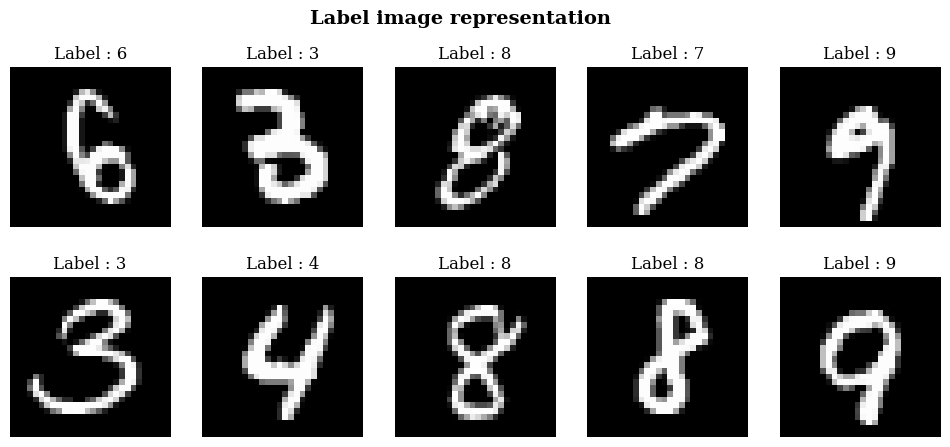

In [5]:
# Showing some images in matplotlib

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))

fig.suptitle('Label image representation', fontsize=14, fontweight='bold', fontfamily='serif')

for ax in axs.flatten():
    rnd_number = np.random.randint(low=0, high=len(X_train))

    ax.imshow(X_train[rnd_number], cmap='gray')
    ax.set_title(f'Label : {y_train[rnd_number]}', fontfamily='serif')

    ax.set_axis_off()

# Preprocess data

In [6]:
# Add padding and after reshape, so It can hold the requirement the LeNet-5 model desires which input example shape is (32, 32, 1)
X_train_mod = np.pad(X_train, ((0, 0), (2, 2), (2, 2)))
X_test_mod = np.pad(X_test, ((0, 0), (2, 2), (2, 2)))

In [7]:
# Reshape data
X_train_mod = X_train_mod.reshape(-1, 32, 32, 1)
X_test_mod = X_test_mod.reshape(-1, 32, 32, 1)

In [8]:
# Normalize data
X_train_mod = X_train_mod / 255.0
X_test_mod = X_test_mod / 255.0

In [9]:
# One - Hot Encoding
y_train_mod = to_categorical(y_train)
y_test_mod = to_categorical(y_test)

# Create Model and Train

In [10]:
# LeNet-5 Structure

model = Sequential()

# Convolutional Layer as C1
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 1)))

# Pooling Layer as P2
model.add(AveragePooling2D(pool_size=(2, 2)))

# Convolutional Layer as C3
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

# Pooling Layer as P4
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten Layer as F5
model.add(Flatten())

# Dense Layer as D6
model.add(Dense(120, activation='relu'))

# Dense Layer as D7
model.add(Dense(84, activation='relu'))

# Dense Layer as D8
model.add(Dense(10, activation='softmax'))

In [11]:
# Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [39]:
# Compile and fit model

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Stop training if no improvement for 5 epochs
    verbose=1,            # Print progress updates
    restore_best_weights=True # Restore the best model weights
)

history = model.fit(X_train_mod, y_train_mod, epochs=30, validation_data=(X_test_mod, y_test_mod), callbacks=[early_stopping])

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0637 - val_accuracy: 0.9898
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0692 - val_accuracy: 0.9910
Epoch 3/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0604 - val_accuracy: 0.9913
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0663 - val_accuracy: 0.9910
Epoch 5/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0656 - val_accuracy: 0.9896
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0839 - val_accuracy: 0.9899
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0700 - val_accuracy

# Evaluate Model

In [13]:
model.evaluate(X_test_mod)

313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

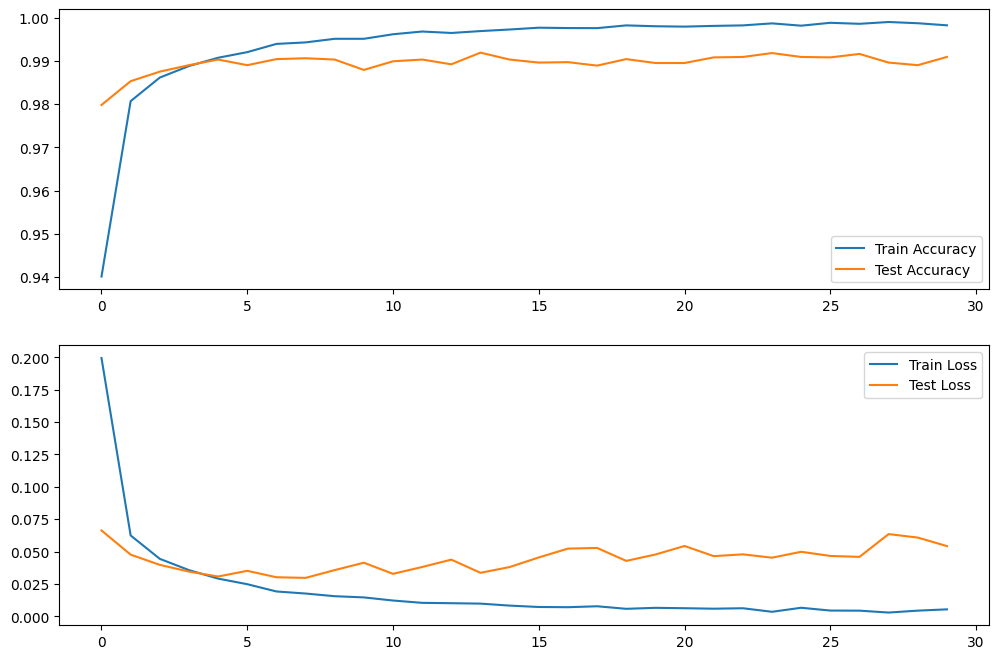

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Test Accuracy')

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Test Loss')

ax[0].legend()
ax[1].legend()

* From here, We can see It is enough if we use 10 epoch, after epoch > 10, that leads to overfitting !

# Predict Cases

1/1 [==============================] - 0s 19ms/step


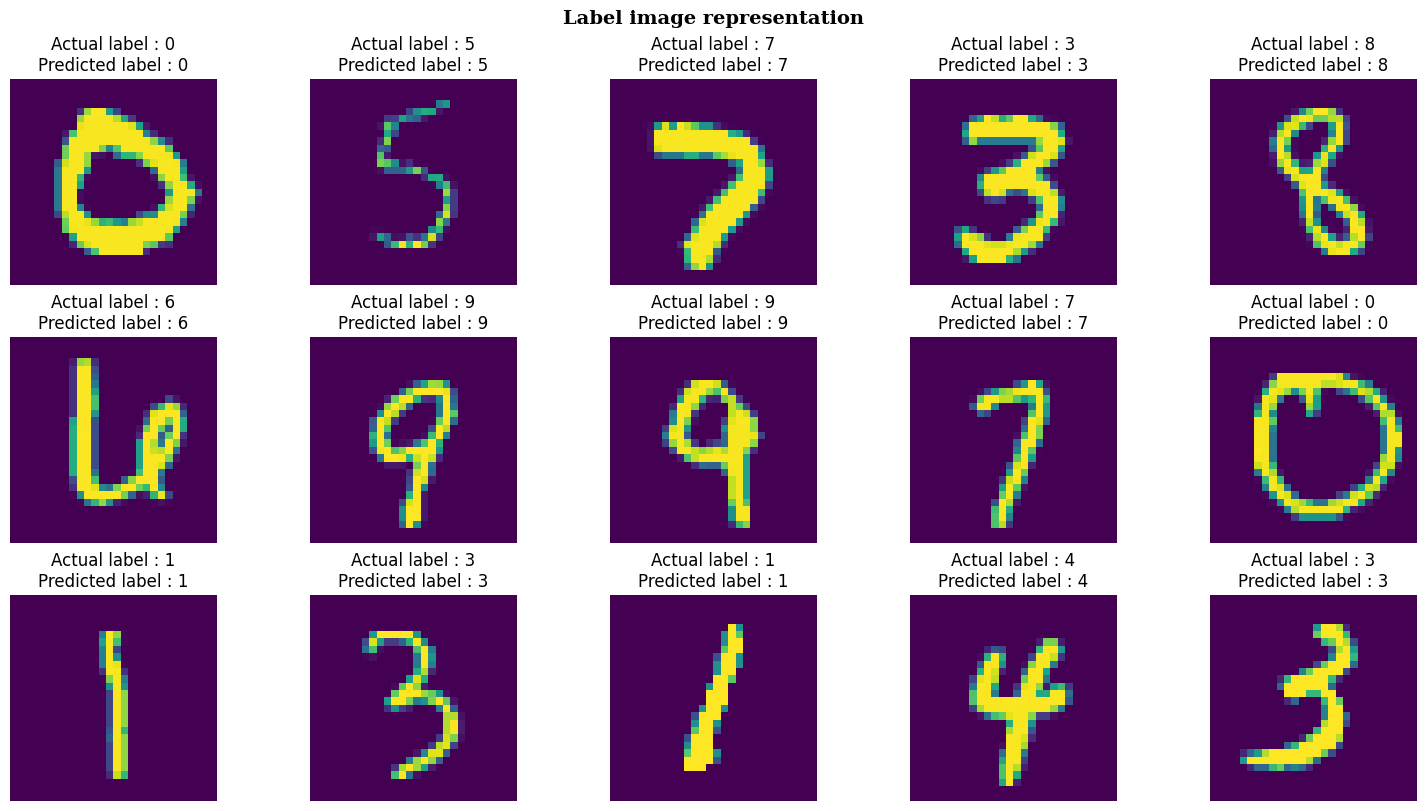

In [15]:
# Predict a bunch of examples in this model

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 8), constrained_layout=True)

fig.suptitle('Label image representation', fontsize=14, fontweight='bold', fontfamily='serif')

for ax in axs.flatten():
    rnd_number = np.random.randint(low=0, high=len(X_test))
    _trained_sample = X_test_mod[rnd_number].reshape(-1, 32, 32, 1)

    prediction_vect = model.predict(_trained_sample)
    prediction_label = tf.argmax(prediction_vect, axis=1).numpy()[0]

    ax.imshow(X_test[rnd_number])

    ax.set_title(f'Actual label : {y_test[rnd_number]}\n' +
                 f'Predicted label : {prediction_label}')

    ax.set_axis_off()

In [34]:
import cv2
import os


dir_name = 'Images'
collections = []

for img_path in os.listdir(dir_name):
  img = cv2.imread(os.path.join(dir_name, img_path), 0)
  resize_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
  collections.append(resize_img)

1/1 [==============================] - 0s 17ms/step


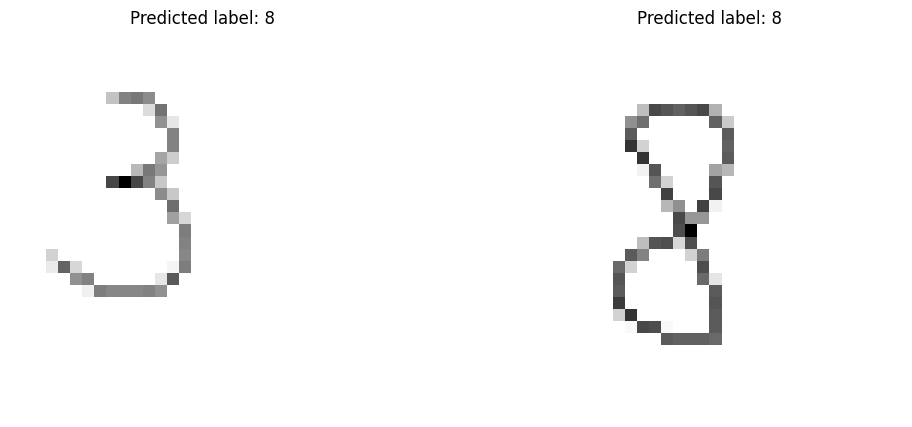

In [35]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12, 5))
for i, ax in enumerate(axs.flatten()):
    img = collections[i].reshape(1, 32, 32, 1) / 255

    predicted_vect = model.predict(img)
    predicted_label = tf.argmax(predicted_vect, axis=1).numpy()[0]

    ax.imshow(collections[i], cmap='gray')
    ax.set_title('Predicted label: {}'.format(predicted_label))
    ax.set_axis_off()

plt.show()

In [ ]:
model.evaluate(X_test_mod)